In [1]:
library(reshape)
library(neuralnet)
library(NeuralNetTools)
library(caret)
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: lattice
Loading required package: ggplot2
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::compute() masks neuralnet::compute()
✖ tidyr::expand()  masks reshape::expand()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ purrr::lift()    masks caret::lift()
✖ dplyr::rename()  masks reshape::rename()


In [2]:
# creating training data set
TKS=c(20,10,30,20,80,30)
CSS=c(90,20,40,50,50,80)
Placed=c(1,0,0,0,1,1)
# Here, you will combine multiple columns or features into a single set of data
(df=data.frame(TKS,CSS,Placed))

TKS,CSS,Placed
<dbl>,<dbl>,<dbl>
20,90,1
10,20,0
30,40,0
20,50,0
80,50,1
30,80,1


[[1]]
[[1]][[1]]
           [,1]        [,2]        [,3]
[1,]  9.5107497 -4.30951550  5.26028687
[2,] -0.6891840  0.06403179 -0.02831739
[3,]  0.6302687  0.04822384 -0.07592094

[[1]][[2]]
           [,1]
[1,]   2.038221
[2,]  -1.217297
[3,]   6.317160
[4,] -10.041664

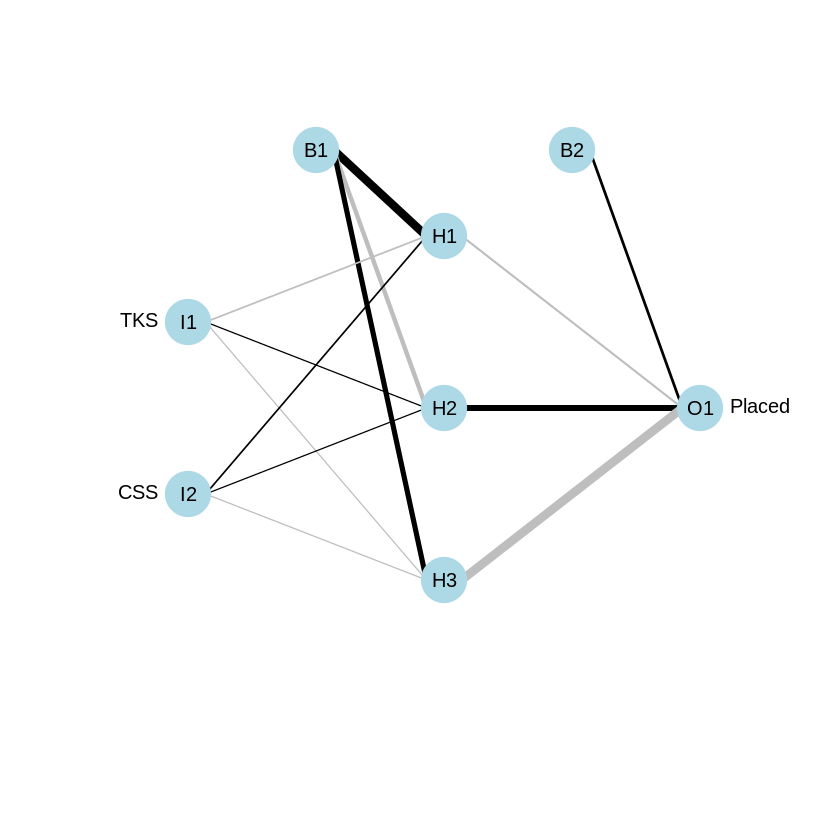

In [3]:
# fit neural network
nn=neuralnet(Placed~TKS+CSS,data=df, hidden=3,act.fct = "logistic",
             linear.output = FALSE)
nn$weights
plotnet(nn)

In [4]:
TKS=c(30,40,85)
CSS=c(85,50,40)
test=data.frame(TKS,CSS)

Predict=neuralnet::compute(nn,test)
Predict$net.result

0.9934258
0.2982085
0.9710172


## Dividend Info

dividend,fcfps,earnings_growth,de,mcap,current_ratio
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.54361055,0.0000000,0.26717557,0.6350575,0.3177037
1,0.99188641,0.3383319,0.26208651,0.7571839,0.5052078
1,0.54969574,0.3427127,0.03307888,0.6594828,0.6798973
0,0.07302231,0.5428812,0.41730280,0.4094828,0.6682316
1,0.58215010,0.3654591,0.45038168,0.8347701,0.8560637
1,0.77687627,0.2183656,0.10178117,0.7442529,0.6135678


[[1]]
[[1]][[1]]
           [,1]       [,2]       [,3]
[1,]  2.7236313 -1.6918738 -1.6170911
[2,] -2.1436436  0.5752346  0.9072433
[3,] -2.0340968 -0.3349299 -0.3065719
[4,] -0.7022277  0.1766023 -2.3590613
[5,] -0.7393123  4.1201376  2.9201898
[6,] -1.9576737  0.6421549  3.4487199

[[1]][[2]]
            [,1]       [,2]       [,3]       [,4]       [,5]
[1,]  -0.4250428   9.491449  0.5781212  0.5874970 -0.2055004
[2,] -27.7369201 -11.156291  2.7543414  3.9822530  4.9446613
[3,]   1.8092365  -6.634621 -0.6837927 -0.6377562 -2.2375994
[4,]   1.9088717  -6.565614 -3.1225389 -4.2709504 -1.2787706

[[1]][[3]]
           [,1]       [,2]
[1,]   1.311091  0.9273258
[2,] -15.058487 13.5899407
[3,] -11.965495  2.5315337
[4,]  -1.164976 -3.6578658
[5,]  -4.500989 -3.6940512
[6,]  -4.768726 -2.0075675

[[1]][[4]]
           [,1]
[1,]   4.627064
[2,] -41.095760
[3,]  -7.344885

[[1]][[5]]
          [,1]
[1,]  15.61601
[2,] -43.32265

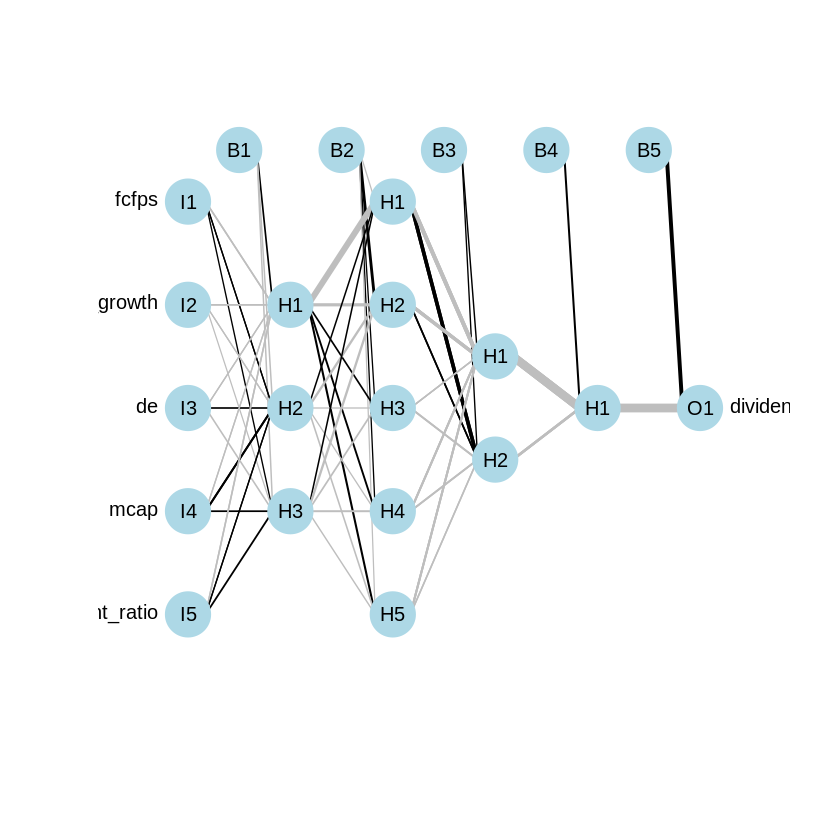

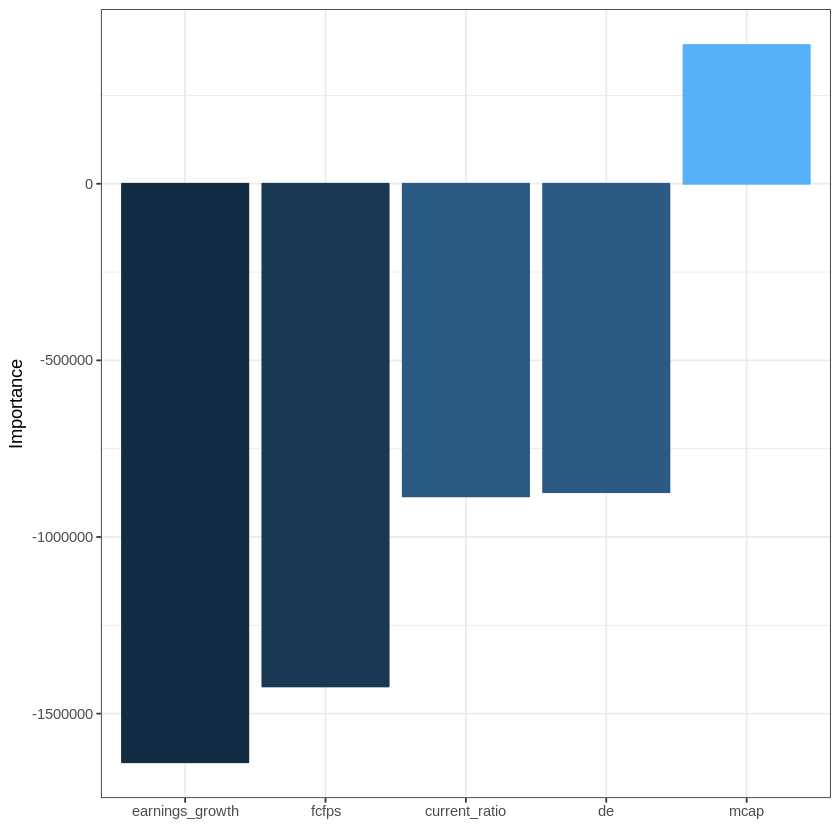

In [5]:
# dividend info -----------------------------------------------------------
df = read.csv('https://transfer.sh/pKW3B/dividend_info.csv')

normalize = function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

normdf = as.data.frame(lapply(df, normalize))
head(normdf)


# Training and Test Data
trainset = normdf[1:160, ]
testset = normdf[161:200, ]

nn = neuralnet(dividend ~ ., data=trainset, hidden=c(3,5,2,1), linear.output=FALSE, threshold=0.01)

plotnet(nn)
nn$weights
olden(nn)

In [6]:
# Test set performance
nn.results = neuralnet::compute(nn, testset)
results = data.frame(actual = testset$dividend, prediction = nn.results$net.result)


results$prediction = round(results$prediction,digits = 0)
table(actual = results$actual,predicted = results$prediction)

      predicted
actual  0  1
     0 17  0
     1  2 21

## Titanic

In [13]:
titanic_df = read_csv('https://transfer.sh/6xede/mod_titanic.csv') %>% select(-PassengerId)
head(titanic_df)

normdf = as.data.frame(lapply(titanic_df, normalize))
head(normdf)
set.seed(31)
test_rows = sample(nrow(normdf),0.3*nrow(normdf))
train = normdf[-test_rows,]
test = normdf[test_rows,]

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Age = col_double(),
  Fare = col_double(),
  has_family_member = col_double(),
  pclass_1 = col_double(),
  pclass_2 = col_double(),
  person_female = col_double(),
  person_child = col_double()
)


Survived,Age,Fare,has_family_member,pclass_1,pclass_2,person_female,person_child
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,22,7.2500,1,0,0,0,0
1,38,71.2833,1,1,0,1,0
1,26,7.9250,0,0,0,1,0
1,35,53.1000,1,1,0,1,0
0,35,8.0500,0,0,0,0,0
0,18,8.4583,0,0,0,0,0


Survived,Age,Fare,has_family_member,pclass_1,pclass_2,person_female,person_child
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.2734561,2.763221e-05,1,0,0,0,0
1,0.4738820,2.716848e-04,1,1,0,1,0
1,0.3235626,3.020486e-05,0,0,0,1,0
1,0.4363021,2.023821e-04,1,1,0,1,0
0,0.4363021,3.068128e-05,0,0,0,0,0
0,0.2233496,3.223745e-05,0,0,0,0,0


## Usando `neuralnet`

[[1]]
[[1]][[1]]
             [,1]        [,2]
[1,]    1.0449698   5.3288850
[2,]    0.4920423   0.1613421
[3,]   33.6770804 -88.4545849
[4,]   -1.1545236   3.8092606
[5,]   -1.2097743  -9.1765724
[6,]    2.2570770  -7.3909102
[7,] -743.5821606  -0.1438602
[8,]   -3.2563802  -3.6024155

[[1]][[2]]
          [,1]
[1,] -8.394491
[2,] 18.479511
[3,]  9.042513

[[1]][[3]]
          [,1]
[1,]  3.140329
[2,] -4.967281

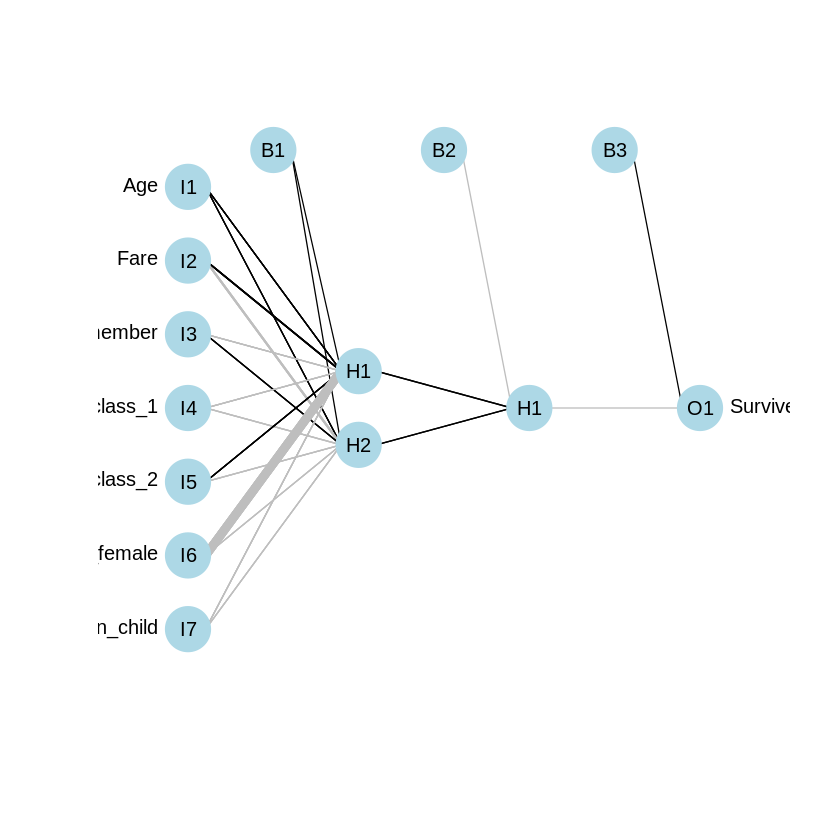

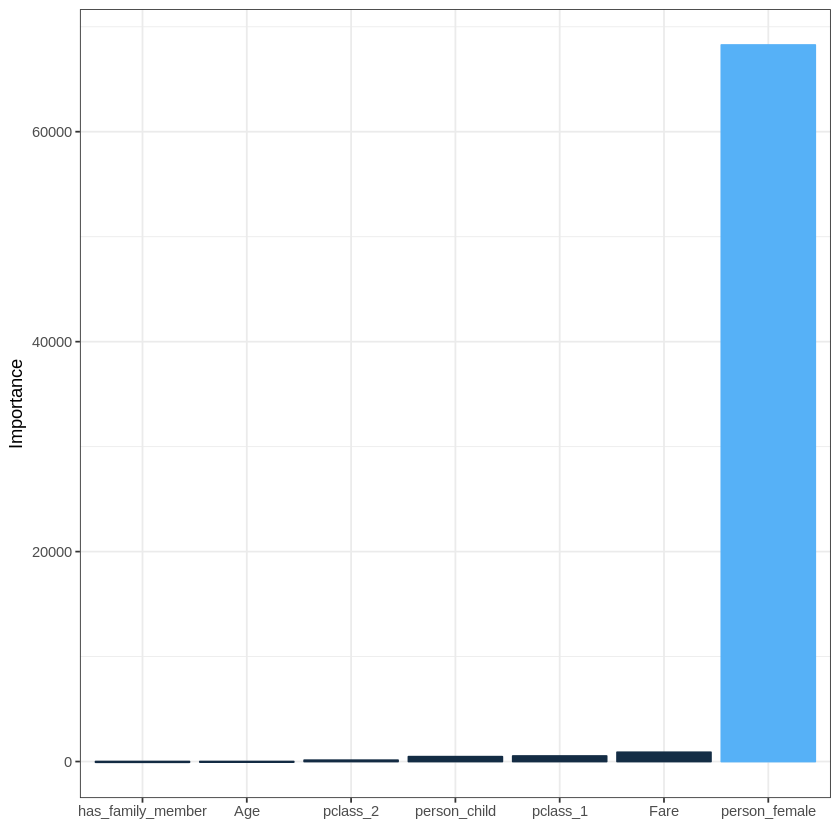

In [17]:
nn = neuralnet(Survived ~ ., data=train, hidden=c(2,1), linear.output=FALSE, threshold=0.01)
plotnet(nn)
nn$weights
olden(nn)

In [18]:
nn.results = neuralnet::compute(nn,test)
results = data.frame(actual = test$Survived, prediction = nn.results$net.result)
#results
results$prediction = round(results$prediction,digits = 0)
table(actual = results$actual,predicted = results$prediction)

      predicted
actual   0   1
     0 245   8
     1  68  71

## Usando `caret` e `nnet`

In [19]:
train$Survived = as.factor(train$Survived)

In [20]:
t0=Sys.time()
nnetGrid <-  expand.grid(size = seq(from = 2, to = 10, by = 2),
                        decay = seq(from = 0.1, to = 0.5, by = 0.1))

nnetFit = train(Survived ~ ., data=train, trace=FALSE,
                method = "nnet",
                tuneGrid = nnetGrid)
t1=Sys.time()
t1-t0

Time difference of 36.97238 secs

In [21]:
nnetFit

Neural Network 

916 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 916, 916, 916, 916, 916, 916, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
   2    0.1    0.7772053  0.5073000
   2    0.2    0.7774494  0.5092402
   2    0.3    0.7761194  0.5073505
   2    0.4    0.7777394  0.5118233
   2    0.5    0.7785636  0.5153844
   4    0.1    0.7776719  0.5099311
   4    0.2    0.7778699  0.5107293
   4    0.3    0.7793392  0.5150270
   4    0.4    0.7775073  0.5123191
   4    0.5    0.7768716  0.5119195
   6    0.1    0.7768123  0.5079956
   6    0.2    0.7789704  0.5132655
   6    0.3    0.7796985  0.5156655
   6    0.4    0.7780011  0.5134769
   6    0.5    0.7783134  0.5154938
   8    0.1    0.7753908  0.5053241
   8    0.2    0.7787332  0.5123738
   8    0.3    0.7792071  0.5143665
   8    0.4    0.7770469  0.5112470
   8    0.5    0.7773543  0.5133595
  10    0.1    0.

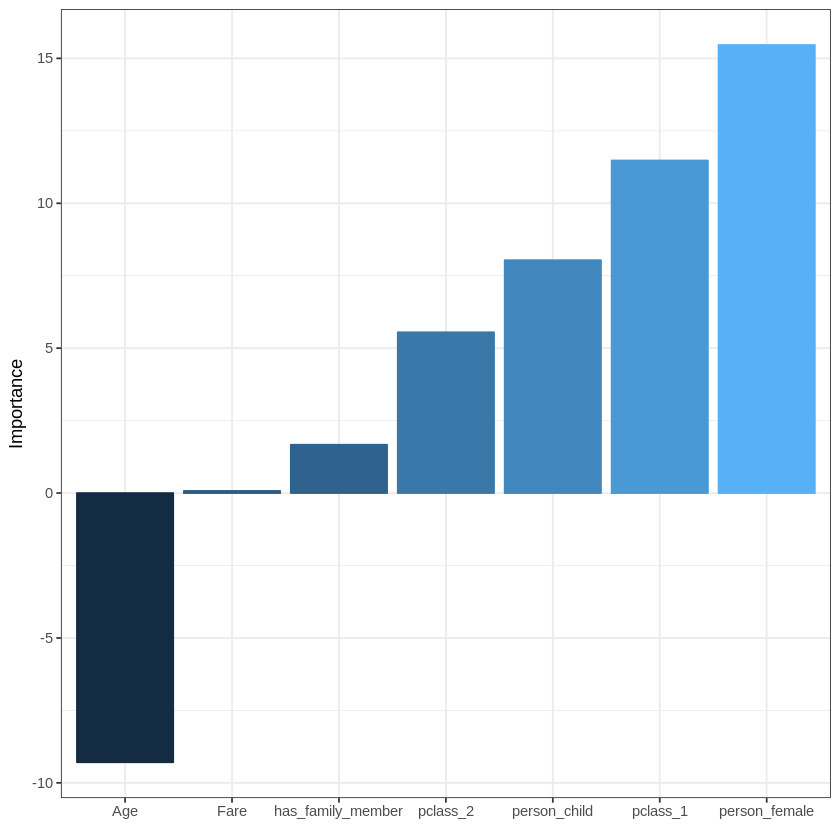

      predicted
actual   0   1
     0 228  25
     1  47  92

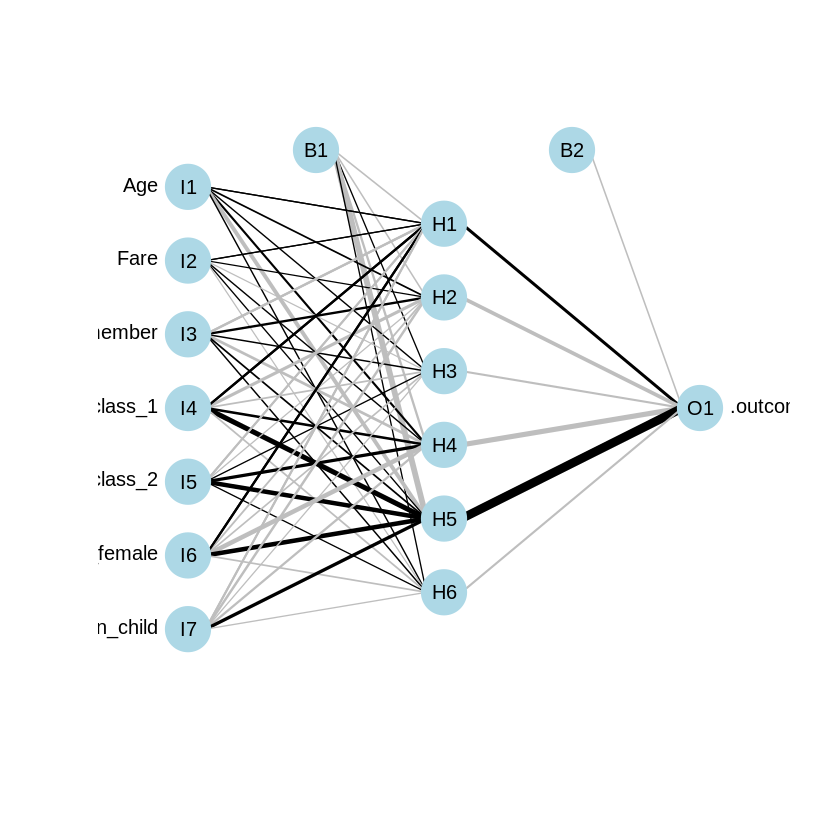

In [22]:
nncaret = nnetFit$finalModel
olden(nncaret)
plotnet(nncaret)

nn.results = predict(nnetFit,test)
results = data.frame(actual = test$Survived, prediction = nn.results)
#results
#results$prediction = round(results$prediction,digits = 0)
table(actual = results$actual,predicted = results$prediction)